In [1]:
from google.colab import drive
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays
!pip install matplotlib==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3442 sha256=dfdd7237032060bd6f4f90e949cc379691589b86976d2e6bd7bffda4a6cc2d59
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=d9167a9e0a78a6f8cd90d903b1f453081b913c6fe6d3a7fcdbfe354d1eff3053
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |███████████████████████

In [1]:
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays
import sort_dataframeby_monthorweek as sd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from scipy.stats import pearsonr
import sort_dataframeby_monthorweek as sd

In [3]:
df = pd.read_csv("/content/drive/MyDrive/hotel_bookings.csv")

In [4]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017


#Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.shape

(119390, 32)

In [7]:
df.isnull().values.any()

True

In [8]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
df.fillna(0,inplace=True)

In [10]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [11]:
df["meal"].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [12]:
df["children"].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [13]:
df["adults"].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [14]:
df["babies"].unique()

array([ 0,  1,  2, 10,  9])

In [15]:
filter = (df["children"]==0) & (df["adults"]==0) & (df["babies"]==0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [16]:
df = df[~filter]

In [17]:
df.shape

(119210, 32)

In [18]:
df["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [19]:
resort = df[(df["hotel"] == "Resort Hotel") & (df["is_canceled"]== 0)]
city = df[(df["hotel"] == "City Hotel") & (df["is_canceled"]== 0)]

In [20]:
resort.shape

(28927, 32)

In [21]:
city.shape

(46084, 32)

In [22]:
labels = resort["country"].value_counts().index
values = resort["country"].value_counts()
values

PRT    10184
GBR     5922
ESP     3105
IRL     1734
FRA     1399
       ...  
UGA        1
COM        1
MUS        1
BIH        1
SAU        1
Name: country, Length: 119, dtype: int64

In [23]:
trace=go.Pie(labels=labels, values=values,
             hoverinfo="label+percent",textinfo="value")

fig = go.Figure(data=[trace])
fig.update_layout(width = 400,height=400)
fig.show()

In [24]:
import folium


#Assignment

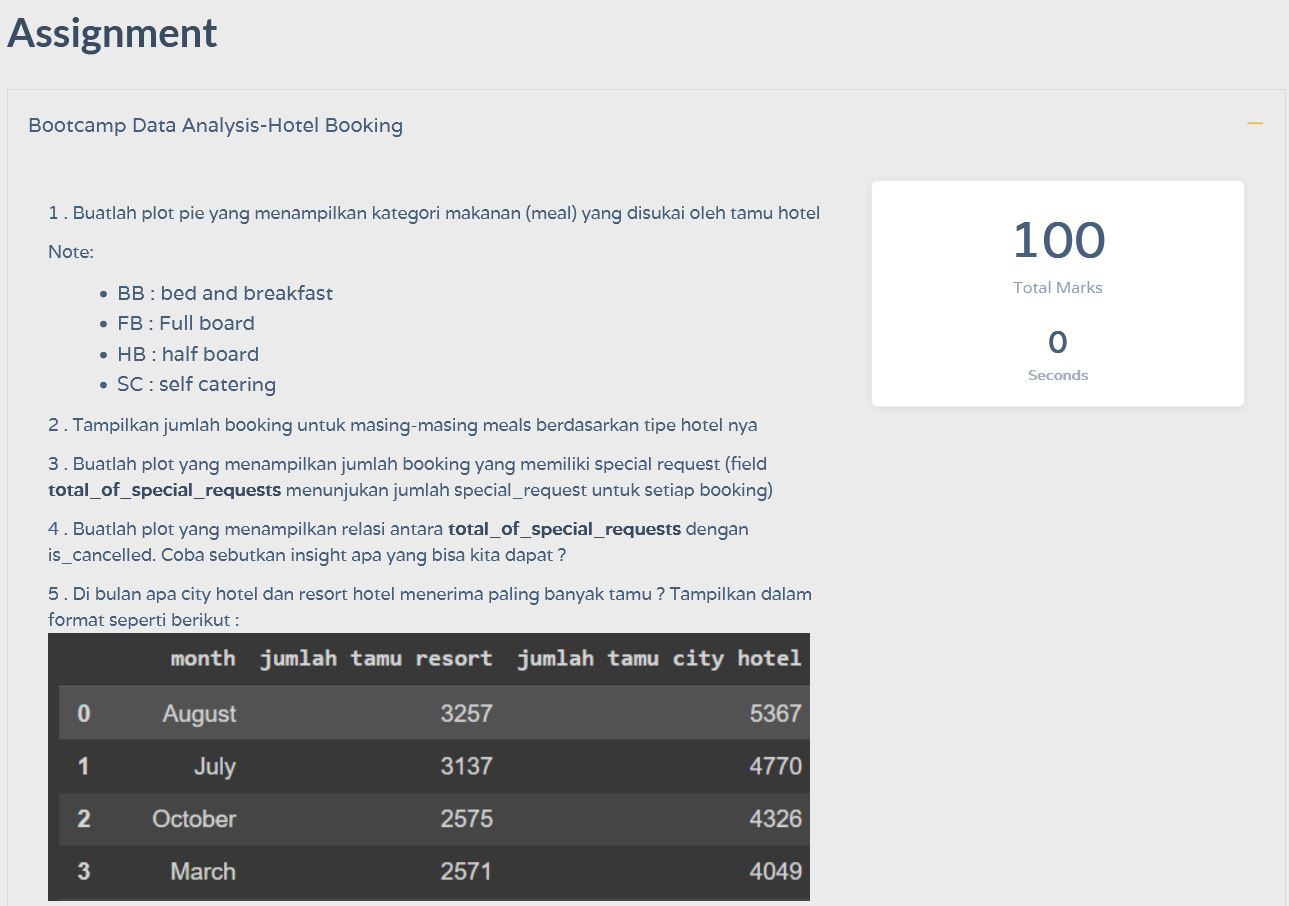

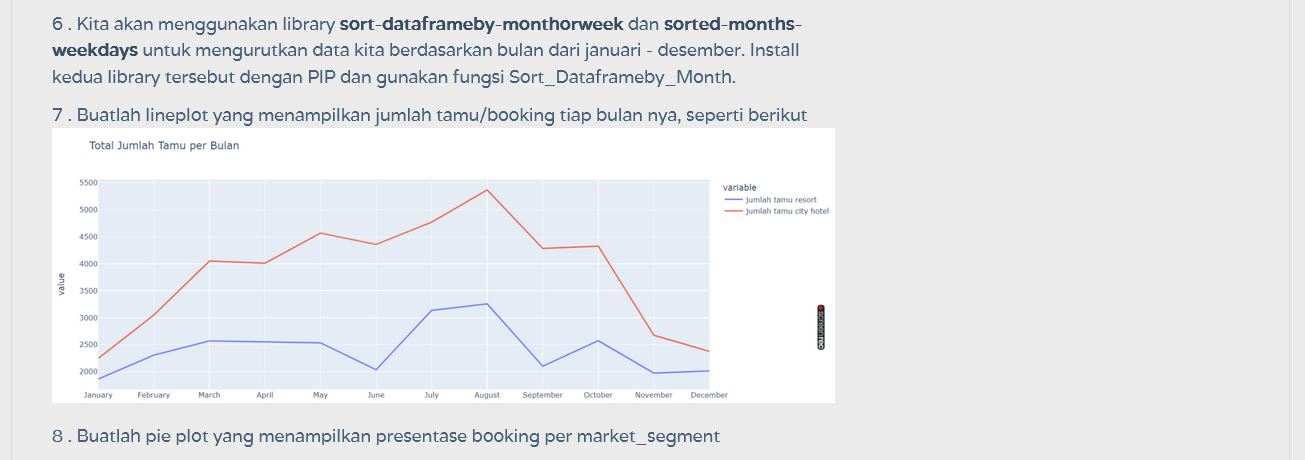

In [ ]:
df["meal"].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
labels = df["meal"].value_counts()[["BB","HB","SC","FB"]].index
values = df["meal"].value_counts()[["BB","HB","SC","FB"]]
values

BB    92310
HB    14463
SC    10650
FB      798
Name: meal, dtype: int64

In [ ]:
#1
trace=go.Pie(labels=labels, values=values,
             hoverinfo="label+percent",textinfo="value")

fig = go.Figure(data=[trace])
fig.update_layout(width = 400,height=400)
fig.show()

In [ ]:
#2

resort_meal = df[(df["hotel"] == "Resort Hotel") & (df["meal"])]
resort_meal = resort_meal[["hotel","meal"]].value_counts()
resort_meal.reset_index(name = "count")

,hotel,meal,count
0,Resort Hotel,BB,30005
1,Resort Hotel,HB,8046
2,Resort Hotel,Undefined,1169
3,Resort Hotel,FB,754
4,Resort Hotel,SC,86


In [ ]:
city_meal = df[(df["hotel"] == "City Hotel") & (df["meal"])]
city_meal = city_meal[["hotel","meal"]].value_counts()
city_meal.reset_index(name = "count")

,hotel,meal,count
0,City Hotel,BB,62305
1,City Hotel,SC,10564
2,City Hotel,HB,6417
3,City Hotel,FB,44


In [ ]:
df['total_of_special_requests'].unique()

array([0, 1, 3, 2, 4, 5])

<AxesSubplot:xlabel='total_of_special_requests', ylabel='Count'>

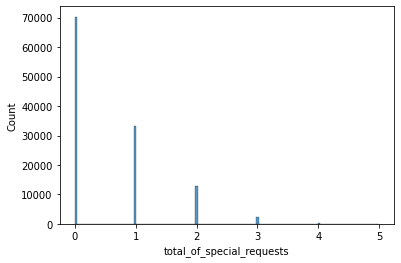

In [ ]:
#3

sns.histplot(data = df['total_of_special_requests'])

In [ ]:
#4
list1 = df[['total_of_special_requests','is_canceled']]
list1

,total_of_special_requests,is_canceled
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
119385,0,0
119386,2,0
119387,4,0
119388,0,0


<AxesSubplot:>

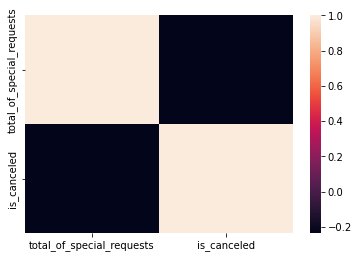

In [ ]:
sns.heatmap(list1.corr())

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
var1 = resort[resort["is_canceled"]==0]
var2 = city[city["is_canceled"]==0]

In [ ]:
var1 = resort.groupby(["arrival_date_month"])["stays_in_weekend_nights",].count().reset_index()
var1

,arrival_date_month,stays_in_weekend_nights
0,April,2550
1,August,3257
2,December,2017
3,February,2308
4,January,1868
5,July,3137
6,June,2038
7,March,2573
8,May,2535
9,November,1976


In [ ]:
var2 = city.groupby(["arrival_date_month"])["stays_in_week_nights"].count().reset_index()
var2

,arrival_date_month,stays_in_week_nights
0,April,4015
1,August,5381
2,December,2392
3,February,3064
4,January,2254
5,July,4782
6,June,4366
7,March,4072
8,May,4579
9,November,2696


In [ ]:
final =var1.merge(var2,on="arrival_date_month")
final[["arrival_date_month","stays_in_weekend_nights","stays_in_week_nights"]]
final.rename(columns={"arrival_date_month":"month","stays_in_weekend_nights":"Jumlah tamu resort","stays_in_week_nights":"Jumlah tamu city"}, inplace=True)
final

,month,Jumlah tamu resort,Jumlah tamu city
0,April,2550,4015
1,August,3257,5381
2,December,2017,2392
3,February,2308,3064
4,January,1868,2254
5,July,3137,4782
6,June,2038,4366
7,March,2573,4072
8,May,2535,4579
9,November,1976,2696


In [ ]:
#6
final2 = sd.Sort_Dataframeby_Month(df=final,monthcolumnname="month")
final2

,month,Jumlah tamu resort,Jumlah tamu city
0,January,1868,2254
1,February,2308,3064
2,March,2573,4072
3,April,2550,4015
4,May,2535,4579
5,June,2038,4366
6,July,3137,4782
7,August,3257,5381
8,September,2102,4290
9,October,2577,4337


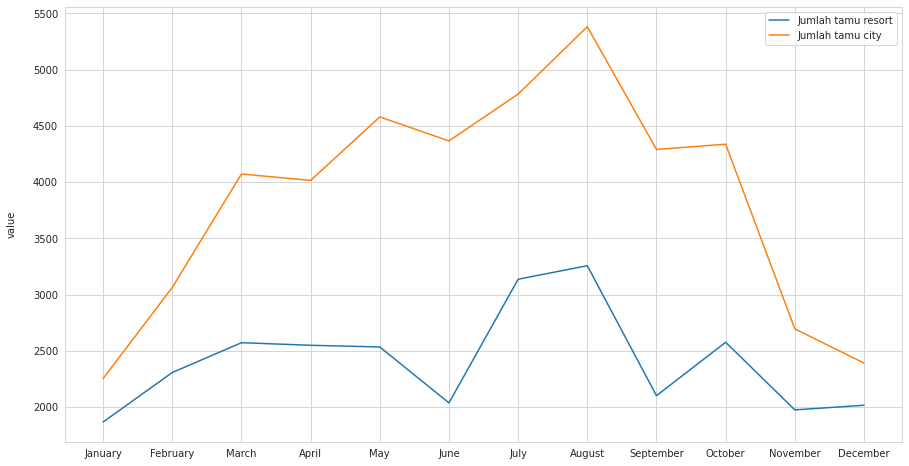

In [ ]:
#7
plt.figure(figsize=(15,8))
plt.plot(final2['month'].values, final2['Jumlah tamu resort'].values, label='Jumlah tamu resort')
plt.plot(final2['month'].values, final2['Jumlah tamu city'].values, label='Jumlah tamu city')

plt.ylabel('value\n')
plt.legend()
plt.show()

In [ ]:
#8

var10 = df["market_segment"].value_counts().index
var11 = df["market_segment"].value_counts()
var11

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [ ]:
trace=go.Pie(labels=var10, values=var11,
             hoverinfo="label+percent",textinfo="value")

fig = go.Figure(data=[trace])
fig.update_layout(width = 400,height=400)
fig.show()